In [102]:
#!pip install openpyxl
#!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas_datareader.data as web

In [112]:
# Indeks LQ45 untuk periode Februari-Juli 2022:
ticker_list = ['ADHI.JK', 'ADRO.JK', 'AKRA.JK', 'ANTM.JK', 'ASII.JK',
               'ASRI.JK', 'BBCA.JK', 'BBNI.JK', 'BBRI.JK', 'BBTN.JK',
               'BKSL.JK', 'BMRI.JK', 'BSDE.JK', 'CPIN.JK', 'ELSA.JK',
               'EXCL.JK', 'GGRM.JK', 'HMSP.JK', 'ICBP.JK', 'INCO.JK',
               'INDF.JK', 'INDY.JK', 'INKP.JK', 'INTP.JK', 'ITMG.JK',
               'JSMR.JK', 'KLBF.JK', 'LPKR.JK', 'LPPF.JK', 'MEDC.JK',
               'MNCN.JK', 'PGAS.JK', 'PTBA.JK', 'PTPP.JK', 'SCMA.JK',
               'SMGR.JK', 'SRIL.JK', 'SSMS.JK', 'TLKM.JK', 'TPIA.JK',
               'UNTR.JK', 'UNVR.JK', 'WIKA.JK', 'WSBP.JK', 'WSKT.JK']

In [117]:
roa = []
roe = []
mcap = []
avgVol = []
name = []
print("Please wait downloading the data..")
for ticker in ticker_list:
    ds = yf.Ticker(ticker)
    roa.append(ds.info['returnOnAssets'])
    roe.append(ds.info['returnOnEquity'])
    mcap.append(ds.info['marketCap'])
    avgVol.append(ds.info['averageVolume'])
df = pd.DataFrame({
    'ROA': roa,
    'ROE': roe,
    'MCap' : mcap,
    'AvgVol' : avgVol
})
df.to_csv('StockData.csv', index=False, encoding='utf-8')
print('DataFrame is written to CSV File successfully.')

ADHI.JK DONE
ADRO.JK DONE
AKRA.JK DONE
ANTM.JK DONE
ASII.JK DONE
ASRI.JK DONE
BBCA.JK DONE
BBNI.JK DONE
BBRI.JK DONE
BBTN.JK DONE
BKSL.JK DONE
BMRI.JK DONE
BSDE.JK DONE
CPIN.JK DONE
ELSA.JK DONE
EXCL.JK DONE
GGRM.JK DONE
HMSP.JK DONE
ICBP.JK DONE
INCO.JK DONE
INDF.JK DONE
INDY.JK DONE
INKP.JK DONE
INTP.JK DONE
ITMG.JK DONE
JSMR.JK DONE
KLBF.JK DONE
LPKR.JK DONE
LPPF.JK DONE
MEDC.JK DONE
MNCN.JK DONE
PGAS.JK DONE
PTBA.JK DONE
PTPP.JK DONE
SCMA.JK DONE
SMGR.JK DONE
SRIL.JK DONE
SSMS.JK DONE
TLKM.JK DONE
TPIA.JK DONE
UNTR.JK DONE
UNVR.JK DONE
WIKA.JK DONE
WSBP.JK DONE
WSKT.JK DONE
DataFrame is written to CSV File successfully.


In [137]:
# Transform The Data
df = pd.read_csv('StockData.csv')
scaler = StandardScaler()
scaler.fit(df)
dfs = scaler.transform(df)
df_scaled = pd.DataFrame(dfs, columns=['ROA','ROE','MCap','AvgVol'])

In [176]:
# K-Means Proses
# km = KMeans(n_clusters=4)
# y_predicted = km.fit_predict(df_scaled[['ROA','ROE','MCap','AvgVol']])
y_predicted = KMeans(n_clusters=4, init='random', max_iter=100, n_init=1, verbose=1)
y_predicted.fit(df_scaled)
y_predicted.cluster_centers_
# cluster_map = pd.DataFrame()
# cluster_map['Stock Code'] = df.index.values
# cluster_map['cluster'] = y_predicted.labels_
# cluster_map[cluster_map.cluster == 0]
# for index, x in enumerate(y_predicted):
#     print(ticker_list[index], "in Cluster -",x)

Initialization complete
Iteration 0, inertia 114.08384146092368
Iteration 1, inertia 88.14086374464256
Iteration 2, inertia 71.10707392908888
Iteration 3, inertia 62.420995041866945
Converged at iteration 3: strict convergence.


array([[-0.00372456,  0.15808669,  3.13998121,  2.0668329 ],
       [ 0.0187393 ,  0.12088385, -0.23895594, -0.4207408 ],
       [-3.22670168, -3.51314343, -0.57345654, -0.94524826],
       [ 0.83516861,  0.36612283, -0.05535492,  1.36777775]])

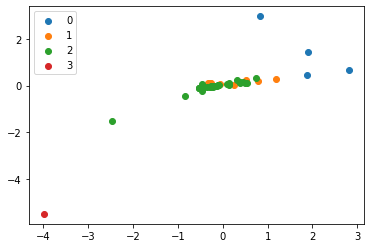

In [147]:
u_labels = np.unique(y_predicted)
for i in u_labels:
    plt.scatter(dfs[y_predicted == i , 0] , dfs[y_predicted == i , 1] , label = i)
plt.legend()
plt.show()